# Embeddings

### Text Embeddings:
* Word Embeddings (words to vectors)
* Sentence Embeddings (sentences to vectors. more subtle nuances of language can be captured)
### Image Embeddings:
* CNN (images to vectors. e. g. can be used for classification problems or to generate a new one)
* Autoencoders (compress image to dense vector representation)
### Other types of Embeddings:
* Graph Embeddings (recommendation systems)
* Sequence Embeddings (for sequence analysis, for example, in time series)

### Most popular metrics is cosine similarity
![](./Screenshot%202025-02-05%20at%2001.00.31.png)

### Word2Vec algorithm
There are 2 types of Word2Vec:
* CBOW (predicts the current word based on the context)
* Skip-gram (uses current word to predict context of sentence)

In [3]:
from gensim.models import Word2Vec


sentences = [
    ["кошка", "ловит", "мышь"],
    ["собака", "гоняется", "за", "кошкой"],
    ["кошка", "бежит", "от", "собаки"]
]

# create model word2vec
model = Word2Vec(sentences, vector_size=500, window=5, min_count=1, workers=4)

In [4]:
model.train(sentences, total_examples=model.corpus_count, epochs=10)

(9, 110)

In [5]:
# get word's vector
vector = model.wv['кошка']

# search for similar words
similar_words = model.wv.most_similar('кошка')
similar_words

[('от', 0.006858852691948414),
 ('ловит', -0.005476333200931549),
 ('собака', -0.006243247073143721),
 ('гоняется', -0.018656417727470398),
 ('за', -0.026103580370545387),
 ('бежит', -0.044851697981357574),
 ('собаки', -0.05466310679912567),
 ('мышь', -0.06217583641409874),
 ('кошкой', -0.06590398401021957)]

### GloVe (Global Vectors for Word Representation)
GloVe creates word vectors by analyzing how often pairs of words occur together in a large text. The idea is that semantic relations between words can be expressed as vector differences. For example, the vectors for "king" - "man" + "woman" should be close to the vector for "queen".

GloVe aims to minimize the difference between the product of word vectors and the logarithm of their co-occurrence, allowing the model to capture different types of relationships between words, such as synonyms, antonyms, contextual relationships, etc.

In [6]:
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import KeyedVectors


glove_file = 'glove_large.6B.100d.txt'
word2vec_output_file = 'glove_large.6B.100d.word2vec'

# convert GloVe file to a format compatible with gensim
glove2word2vec(glove_file, word2vec_output_file)

model = KeyedVectors.load_word2vec_format(word2vec_output_file, binary=False)

/var/folders/6b/8n575wtn6txc6pqgt2qm3p5r0000gn/T/ipykernel_1892/3433702854.py:9: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_file, word2vec_output_file)


In [7]:
vector = model['computer']

similar_words = model.most_similar('computer')
similar_words

[('happiness', 0.7921758890151978),
 ('internet', 0.7801962494850159),
 ('finance', 0.7778392434120178),
 ('city', 0.775002658367157),
 ('woman', 0.7737113237380981),
 ('anger', 0.7734519243240356),
 ('winner', 0.7712622880935669),
 ('justice', 0.7708096504211426),
 ('automation', 0.7697227597236633),
 ('chemistry', 0.7677279114723206)]

## Text clusterization using embeddings

Description: In this projects embeddings are going to be used to clusterize news

In [8]:
import pandas as pd


# to begin with, the test data will be used
data = [
    "Stock market crashes due to economic downturn",
    "Scientists discover new exoplanet with potential for life",
    "Football team wins championship after dramatic match",
    "Tech company releases groundbreaking AI model",
    "Government announces new tax reforms",
    "Astronomers capture first image of black hole",
    "Basketball star breaks all-time scoring record",
    "New smartphone model features revolutionary camera",
    "Loosing the War on Terrorism",
    "E-mail scam targets police chief",
    "Card fraud unit nets 36,000 cards",
    "Apple Launches Graphics Software, Video Bundle"
]

df = pd.DataFrame(data, columns=["text"])
df.head()

,text
0,Stock market crashes due to economic downturn
1,Scientists discover new exoplanet with potenti...
2,Football team wins championship after dramatic...
3,Tech company releases groundbreaking AI model
4,Government announces new tax reforms


In [9]:
from sentence_transformers import SentenceTransformer


model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = model.encode(df["text"].tolist(), convert_to_tensor=True)

f"Embedding dimension: {embeddings.shape}"

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm, trange


'Embedding dimension: torch.Size([12, 384])'

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/threadpoolctl.py:1214: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may c

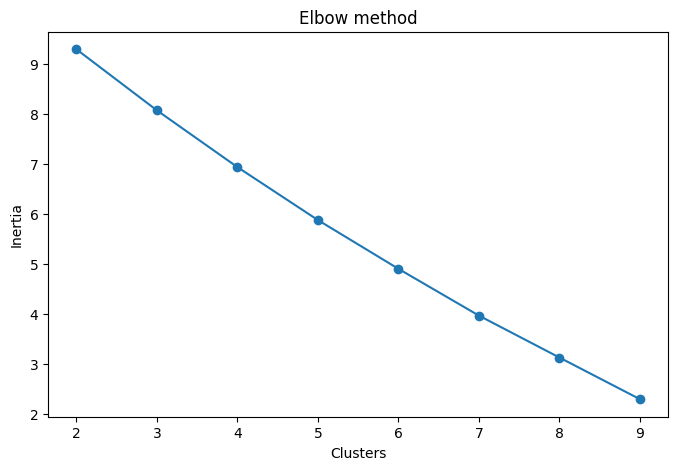

In [10]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


inertia = []
cluster_range = range(2, 10)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(embeddings.cpu().numpy())
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia, marker='o')
plt.xlabel("Clusters")
plt.ylabel("Inertia")
plt.title("Elbow method")
plt.show()

As we can see, elbow method worked not as good as expected. This can be due to:
* Clusters do not have a clear structure
* High dimensional embedding

Alternatively Silhouette Score or Davies-Bouldin Index can help

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-p

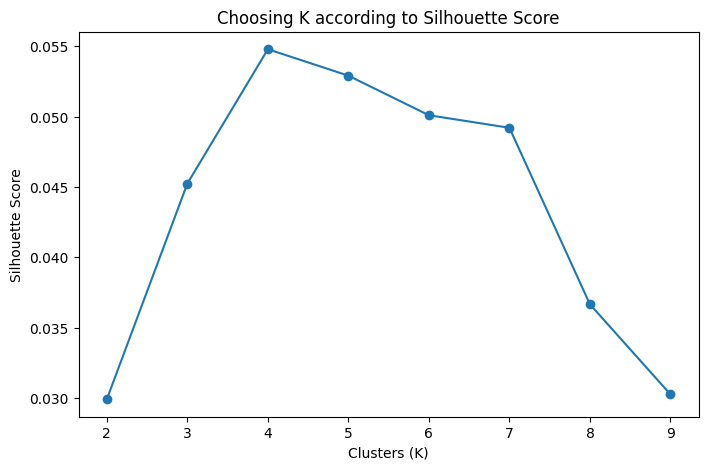

In [21]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


silhouette_scores = []
cluster_range = range(2, 10)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(embeddings.cpu().numpy())
    score = silhouette_score(embeddings.cpu().numpy(), labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 5))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel("Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Choosing K according to Silhouette Score")
plt.show()


So now it is clear that k=4 is the most optimal value

In [12]:
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df["cluster"] = kmeans.fit_predict(embeddings.cpu().numpy())

df

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,text,cluster
0,Stock market crashes due to economic downturn,1
1,Scientists discover new exoplanet with potenti...,0
2,Football team wins championship after dramatic...,3
3,Tech company releases groundbreaking AI model,0
4,Government announces new tax reforms,0
5,Astronomers capture first image of black hole,0
6,Basketball star breaks all-time scoring record,3
7,New smartphone model features revolutionary ca...,0
8,Loosing the War on Terrorism,1
9,E-mail scam targets police chief,2


Also to visualize clusters, we'll need to reduce dimensions. Let's say, our plot will have 2 dimensions. PCA is suitable here due to it's execution speed.

How to choose dimensionality reduction method:

| Method | When to use |
| ------- | -------- |
| PCA | If global structures are important, it works quickly |
| t-SNE | For complex clusters, but works slow |
| UMAP | Flexible, preserves both local and global structures well |

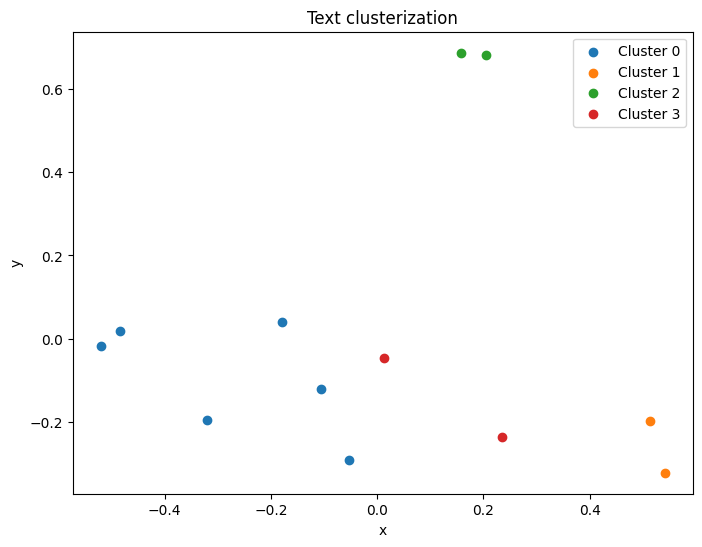

In [13]:
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings.cpu().numpy())

plt.figure(figsize=(8, 6))
for i in range(num_clusters):
    plt.scatter(reduced_embeddings[df["cluster"] == i, 0], reduced_embeddings[df["cluster"] == i, 1], label=f"Cluster {i}")

plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Text clusterization")
plt.show()

Now let's take a real dataset from Kaggle. We'll use this one -> https://www.kaggle.com/datasets/amananandrai/ag-news-classification-dataset/data

In [14]:
import kagglehub


path = kagglehub.dataset_download("amananandrai/ag-news-classification-dataset")

df = pd.read_csv(path + "/train.csv")

df.head()

,Class Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


The column "Class Index" contains information about already clustered news. So we'll drop it

In [15]:
df = df.drop(columns="Class Index")
df.head()

,Title,Description
0,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


We'll work with news' titles. Let's apply embeddings

In [16]:
model = SentenceTransformer('all-MiniLM-L6-v2')
title_embeddings = model.encode(df["Title"].tolist(), convert_to_tensor=True)

f"Title: {title_embeddings.shape}"

'Title: torch.Size([120000, 384])'

Done! Took almost eternity. Now, let's check if elbow method is appropriate

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-p

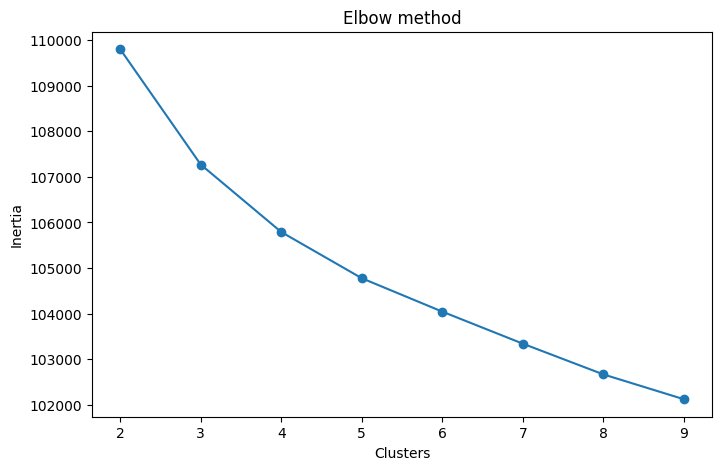

In [17]:
inertia = []
cluster_range = range(2, 10)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(title_embeddings.cpu().numpy())
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia, marker='o')
plt.xlabel("Clusters")
plt.ylabel("Inertia")
plt.title("Elbow method")
plt.show()

As we can see, it's also not so useful. Let's try another one

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-p

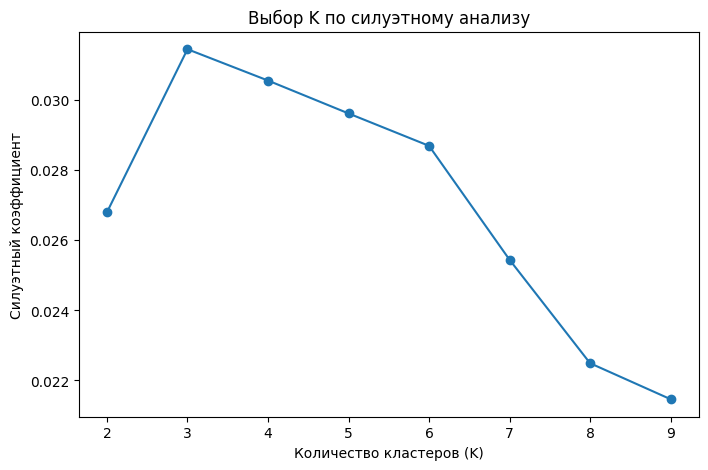

In [20]:
silhouette_scores = []
cluster_range = range(2, 10)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(title_embeddings.cpu().numpy())
    score = silhouette_score(title_embeddings.cpu().numpy(), labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 5))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel("Количество кластеров (K)")
plt.ylabel("Силуэтный коэффициент")
plt.title("Выбор K по силуэтному анализу")
plt.show()

We've found that for this dataset k=3 is suitable

In [22]:
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df["cluster"] = kmeans.fit_predict(title_embeddings.cpu().numpy())

df

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Title,Description,cluster
0,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli...",1
1,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...,0
2,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...,0
3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...,2
4,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco...",0
...,...,...,...
119995,Pakistan's Musharraf Says Won't Quit as Army C...,KARACHI (Reuters) - Pakistani President Perve...,2
119996,Renteria signing a top-shelf deal,Red Sox general manager Theo Epstein acknowled...,0
119997,Saban not going to Dolphins yet,The Miami Dolphins will put their courtship of...,1
119998,Today's NFL games,PITTSBURGH at NY GIANTS Time: 1:30 p.m. Line: ...,1


In [ ]:
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(title_embeddings.cpu().numpy())

plt.figure(figsize=(8, 6))
for i in range(num_clusters):
    plt.scatter(reduced_embeddings[df["cluster"] == i, 0], reduced_embeddings[df["cluster"] == i, 1], label=f"Cluster {i}")

plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Text clusterization")
plt.show()